In [29]:
import pybedtools
from pybedtools import BedTool
import itertools as it
from operator import itemgetter
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_dist(sample, distfile):
    traces = collections.defaultdict(list)
    chroms = collections.OrderedDict()
    chroms["total"] = True
    with open(distfile) as fin:
        gen = (x.rstrip().split("\t") for x in fin)
        for chrom, data in it.groupby(gen, itemgetter(0)):
            if chrom.startswith("GL"):
                continue
            if "Un" in chrom: continue
            if "NKL" in chrom: continue
            if "random" in chrom or "HLA" in chrom: continue
            if chrom.endswith("alt"): continue
            chroms[chrom] = True
            xs, ys = [], []
            v50 = 0
            found = False
            for _, x, y in data:
                y = float(y)
                if y < 0.01:
                    continue
                if not found and y > 0.5:
                    v50 = x
                    found = True
                    #print("{}\t{}\t{}\t{:.3f}".format(sample, chrom, x, y))

                xs.append(float(x))
                ys.append(y)
                if len(xs) > 100:
                    xs = [x for i, x in enumerate(xs) if ys[i] > 0.02]
                    ys = [y for y in ys if y > 0.02]
                    if len(xs) > 100:
                        xs = xs[::2]
                        ys = ys[::2]    
            traces[chrom].append({
                'x': [round(x, 3) for x in xs],
                'y': [round(y, 3) for y in ys],
                'mode': 'lines',
                'name': sample + (" (%.1f)" % float(v50))
            })
    return traces['total'][0]

In [3]:
depthfile="bovine/depthofcoverage/bovine37160.mosdepth.global.dist.txt"
dist = plot_dist("bovine", depthfile)

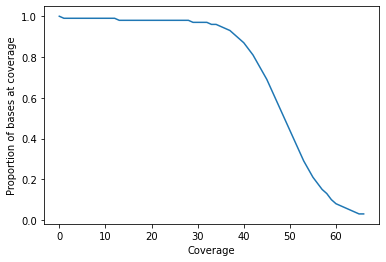

In [4]:
fig, ax = plt.subplots()
ax.plot(dist['x'], dist['y'])
ax.set_xlabel("Coverage")
tmp = ax.set_ylabel("Proportion of bases at coverage")

In [5]:
depthfile="maize/depthofcoverage/F4.mosdepth.global.dist.txt"
dist = plot_dist("maize", depthfile)

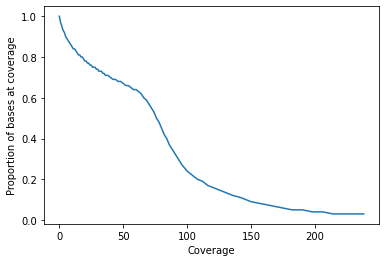

In [6]:
fig, ax = plt.subplots()
ax.plot(dist['x'], dist['y'])
ax.set_xlabel("Coverage")
tmp = ax.set_ylabel("Proportion of bases at coverage")

In [58]:
region = BedTool('chr1 0 100000000\nchr2 0 100000000', from_string=True)
coverage = BedTool('maize/depthofcoverage/F4.regions.bed.gz')

In [59]:
subset = coverage.intersect(region)  

***** WARNING: File maize/depthofcoverage/F4.regions.bed.gz has inconsistent naming convention for record:
scaf_21	0	500	84.07

***** WARNING: File maize/depthofcoverage/F4.regions.bed.gz has inconsistent naming convention for record:
scaf_21	0	500	84.07



In [60]:
x = [float(r[3]) for r in subset]
dist = pd.DataFrame(x, columns=['coverage'])

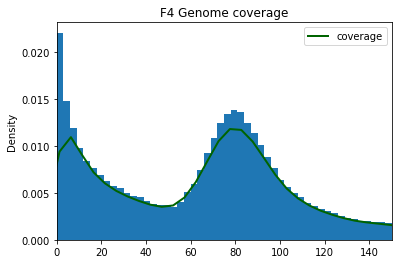

In [61]:
fig, ax = plt.subplots()
dist.plot.hist(density=True, ax=ax, bins=50, range=(0,150))
dist.plot.kde(ax=ax, legend=False, title='F4 Genome coverage', color="darkgreen",linewidth=2)
ax.set_ylabel('Density') 
tmp = ax.set_xlim(0,150)

In [62]:
region = BedTool('1 0 100000000\n2 0 100000000', from_string=True)
coverage = BedTool('bovine/depthofcoverage/bovine37160.regions.bed.gz')

In [63]:
subset = coverage.intersect(region)  

In [64]:
x = [float(r[3]) for r in subset]
dist = pd.DataFrame(x, columns=['coverage'])

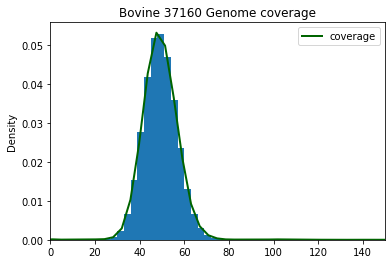

In [65]:
fig, ax = plt.subplots()
dist.plot.hist(density=True, ax=ax, bins=50, range=(0,150))
dist.plot.kde(ax=ax, legend=False, title='Bovine 37160 Genome coverage', color="darkgreen",linewidth=2)
ax.set_ylabel('Density') 
tmp = ax.set_xlim(0,150)